In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x_data = np.loadtxt('X.dat')
y_data = np.loadtxt('y.dat')
#x_data =  pd.read_csv('x.csv', sep=' ', header=None)
#y_data = pd.read_csv('y.dat', header=None)


In [64]:
reg = LogisticRegression(penalty='none', fit_intercept=False).fit(x_data, y_data)
reg.score(x_data, y_data)
reg.coef_
reg.intercept_
#reg.predict(np.array([[3, 5]]))
print(reg.score(x_data, y_data))
print(reg.coef_)
print(reg.coef_[0][1])
print(reg.intercept_)
w1 = reg.coef_[0][0]
w2 = reg.coef_[0][1]


0.805
[[1.0519754  0.86226372]]
0.8622637190903323
[0.]


In [65]:
# Accuracy of the scikit learn model
print(reg.score(x_data, y_data))


0.805


In [66]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [67]:
## Logistic Regression with SSE
#l_sse=sum((y_data-sigmoid(x_data.dot(w[i,:]))**2))

y_data[y_data == -1] = 0
y_data=y_data.reshape((400,1))

epoch = 100
lr = 0.001 
w = np.zeros((epoch,2))
w[0,:] = [1,-1]


for i in range(epoch-1):
    lsw = sigmoid(np.dot(w[i,:],x_data.T)).reshape((400,1))
    dif_l_sse = sum(
        2*(y_data-lsw)
        *(-lsw)
        *(1-lsw)
        *x_data
)
    w[i+1] = w[i] - lr * dif_l_sse

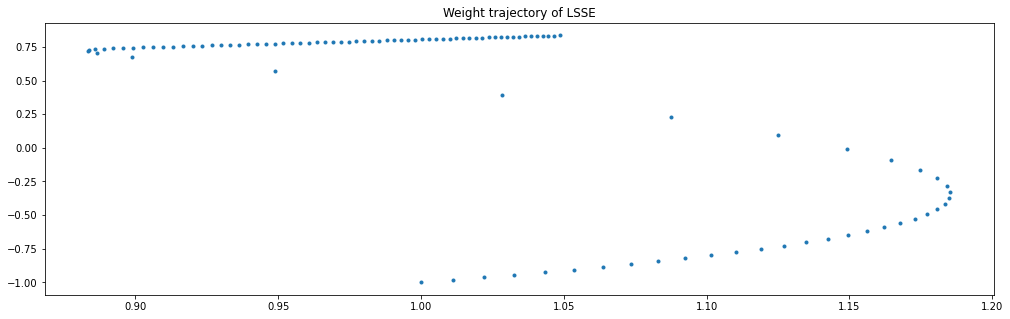

In [68]:
plt.figure(figsize=(17, 5))
plt.plot(w[:,0],w[:,1],'.')
plt.title('Weight trajectory of LSSE')
plt.show()

In [69]:
## Logistic Regression with ML

epoch = 100
lr = 0.001 
w2 = np.zeros((epoch,2))
w2[0,:] = [1,-1]


for i in range(epoch-1):
    #l_sse=sum((y_data-sigmoid(x_data.dot(w[i,:]))**2))
    lsw = sigmoid(np.dot(w2[i,:],x_data.T)).reshape((400,1))
    dif_l_sse = sum(
        (y_data*(1-lsw)
        -(1-y_data)*lsw)*x_data
)
    w2[i+1] = w2[i] + lr * dif_l_sse

In [70]:
lsw = sigmoid(np.dot(w[0,:],x_data.T)).reshape((400,1))
dif_l_sse = sum(
        (y_data*(1-lsw)
        -(1-y_data)*lsw)*x_data
)
#w2[i+1] = w2[i] - lr * dif_l_sse
print(dif_l_sse)

[-393.58021125 1007.50619412]


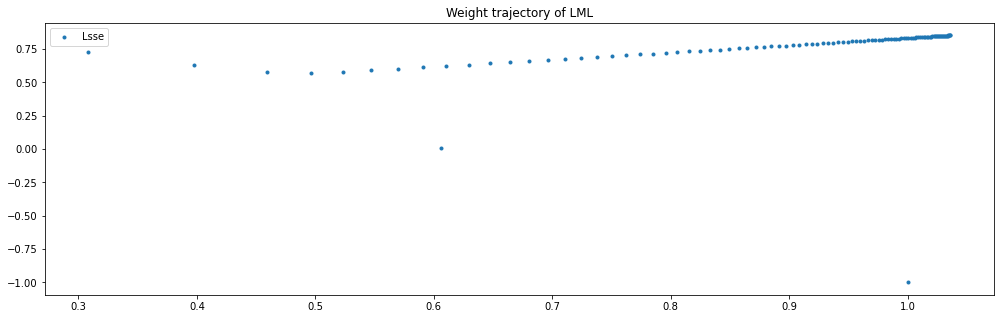

In [71]:
plt.figure(figsize=(17, 5))
plt.plot(w2[:,0],w2[:,1],'.')
plt.title('Weight trajectory of LML')
plt.legend(['Lsse', 'LML'])
plt.show()

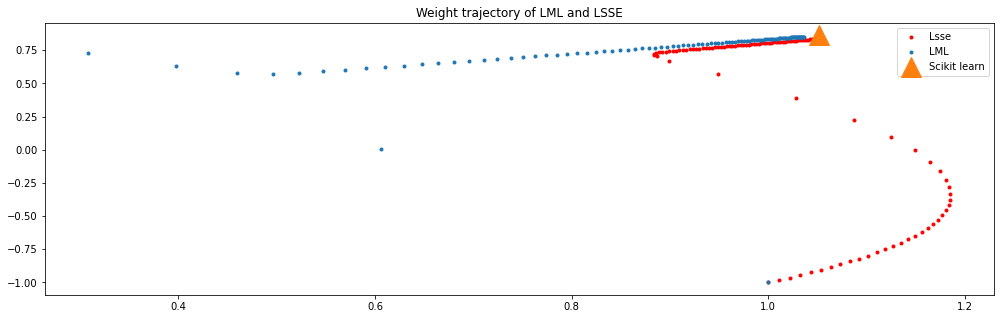

In [78]:
plt.figure(figsize=(17, 5))
plt.plot(w[:,0],w[:,1],'r.')
plt.plot(w2[:,0],w2[:,1],'.')
plt.plot(reg.coef_[0][0],reg.coef_[0][1], '^', markersize=20)
plt.title('Weight trajectory of LML and LSSE')
plt.legend(['Lsse', 'LML','Scikit learn'])
plt.show()